# Breast Cancer Diagnosis - Classification

## Dataset Information

This dataset is called "Breast cancer wisconsin (diagnostic) dataset"
and it contains 30 features for 569 examples that describe various properties of tumours identified.

Some of these features are:

- radius (mean of distances from center to points on the perimeter)

- texture (standard deviation of gray-scale values)

- perimeter

- area

- smoothness (local variation in radius lengths)

- compactness (perimeter^2 / area - 1.0)

- concavity (severity of concave portions of the contour)

- concave points (number of concave portions of the contour)

- symmetry

- fractal dimension (“coastline approximation” - 1)

## Classification Task

We use the given information about a tumour to predict whether it is malignant (0) or benign (1)

## The algorithms compared

We compare SVM and logistic regression models on the basis of how accurately they predict unseen test data;
we also compare how robust the two models are to changes in hyperparameters

## Getting the Data

In [121]:
from sklearn import datasets
import numpy as np

In [122]:
cancer_dataset = datasets.load_breast_cancer()

In [123]:
target = cancer_dataset.target

In [124]:
feature_matrix = cancer_dataset.data

## Preprocessing

### Separation into training and test sets

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target, test_size=0.3, random_state=1, stratify=target)

### Feature Scaling

In [126]:
## features are scaled according to training set's statistical properties
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training Logistic Regression Model

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
## we use limited-memory Broyden–Fletcher–Goldfarb–Shanno (BFGS) optimization algorithm
## we only have 2 classes - so no need to worry about multiclass scheme
lr = LogisticRegression(C=10.0, random_state=1, solver='lbfgs', max_iter = 500)

In [129]:
## training the logistic regression model
lr.fit(X_train_std, y_train)

LogisticRegression(C=10.0, max_iter=500, random_state=1)

## Training SVM Model

In [130]:
from sklearn.svm import SVC

In [131]:
svm = SVC(kernel='linear', random_state=1, gamma=1.0, C=10.0)

##### Note I am using linear kernel for SVM. RBF kernel generally gives lower accuracies

In [132]:
svm.fit(X_train_std, y_train)

SVC(C=10.0, gamma=1.0, kernel='linear', random_state=1)

## Comparing the performance of two models 

### Accuracy of prediction of the test data set

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
y_pred = lr.predict(X_test_std)
print('Logistic Regression Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.965


In [135]:
y_pred = svm.predict(X_test_std)
print('SVM Accuracy: %.3f' % accuracy_score(y_test, y_pred))

SVM Accuracy: 0.971


### Robustness to changes of the hyperparameters

In [136]:
from matplotlib import pyplot as plt

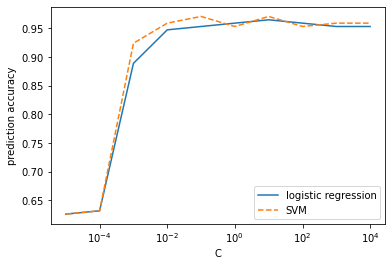

In [137]:
## Looking at changes in accuracy as the C hyperparameter changes

accuracy_vals_lr = []
accuracy_vals_svm = []
C_vals = []

for c in range(-5, 5):
    lr_example = LogisticRegression(C=10.0**c, random_state=1, solver='lbfgs', max_iter=1000)
    svm_example = SVC(kernel='linear', random_state=1, gamma=1.0, C=10.0**c)
    
    lr_example.fit(X_train_std, y_train)
    svm_example.fit(X_train_std, y_train)
    
    y_pred_lr = lr_example.predict(X_test_std)
    y_pred_svm = svm_example.predict(X_test_std)
    
    accuracy_vals_lr.append(accuracy_score(y_test, y_pred_lr))
    accuracy_vals_svm.append(accuracy_score(y_test, y_pred_svm))
    
    C_vals.append(10.**c)
    
accuracy_vals_lr = np.array(accuracy_vals_lr)
accuracy_vals_svm = np.array(accuracy_vals_svm)
C_vals = np.array(C_vals)

plt.plot(C_vals, accuracy_vals_lr, label='logistic regression')
plt.plot(C_vals, accuracy_vals_svm, label='SVM', linestyle='--')

plt.ylabel('prediction accuracy')
plt.xlabel('C')
plt.legend(loc='lower right')
plt.xscale('log')
plt.show()

## Conclusion

When it comes to the accuracy of predictions made about the unseen test data, 
Logistic Regression and SVM models have accuracies of 96.5% and 97.1% respectively.
This shows that accuracy levels of the two models are fairly close when C hyperparameter - that is
used to find a balance between high bias and high variance - is 10.0

In order to make this analysis more complete, it makes sense that comparing two models at C=10.0
isn't enough.
Thus, we compare the two models on how robust they are to changes in C hyperparameter.

The result we get shows that the two models behave quite similarly. Nevertheless, there are some minor differences:

1. Logistic Regression has less fluctuations as C changes

2. SVM, generally, has slightly higher accuracy values